In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

12 december


In [ ]:
dec12 = pd.read_csv("option-chain-ED-BANKNIFTY-12-Dec-2022.csv",sep=(';'),na_values = ["-"])
dec12

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,3.0,2.0,4.0,75.93,7242.10,212.10,750,6992.00,7216.55,750,...,1625,2.40,2.45,25.0,0.05,2.45,51.31,87801.0,9766.0,11351.0
1,16.0,NaN,NaN,NaN,6586.40,3.75,150,6582.75,6758.00,750,...,3400,2.45,2.50,250.0,-0.25,2.50,47.88,38171.0,1755.0,4375.0
2,NaN,NaN,NaN,NaN,NaN,NaN,150,6085.60,6268.20,750,...,525,2.70,2.80,25.0,-0.35,2.70,44.72,23243.0,797.0,1227.0
3,7.0,NaN,1.0,59.90,5738.10,180.45,150,5588.75,5719.60,750,...,275,2.95,3.15,2950.0,-0.75,2.95,41.59,45981.0,3043.0,5108.0
4,4.0,NaN,NaN,NaN,5025.35,NaN,150,5082.80,5221.65,750,...,200,3.45,3.70,1200.0,-0.25,3.70,39.04,31505.0,190.0,3802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,29670.0,21405.0,260320.0,21.49,5.25,0.40,25,5.25,5.30,200,...,750,2777.70,2942.45,625.0,-1905.05,2903.35,38.70,6.0,4.0,4.0
70,23263.0,15386.0,194522.0,23.97,4.20,-0.10,850,4.20,4.65,25,...,750,3283.05,3457.25,625.0,-1866.40,3393.20,42.44,22.0,22.0,22.0
71,10422.0,7795.0,87973.0,26.50,3.60,-0.40,2475,3.60,4.50,1025,...,750,3760.20,3941.90,275.0,-1786.65,3933.50,51.17,67.0,34.0,34.0
72,11328.0,8301.0,106069.0,29.11,3.30,-0.55,10000,3.20,3.30,600,...,750,4261.20,4438.10,150.0,-1785.75,4402.65,52.53,18.0,18.0,18.0


In [ ]:
dec8=dec8.fillna(0)

In [ ]:
import datetime

 
dt_ref = datetime.datetime.combine(datetime.date(year=2022, month=12, day=12), datetime.time(hour=9, minute=0, second=0))
Time_dec8 =[]
for i in range(74):
    
    Time_dec8.append(dt_ref)
    dt_ref += datetime.timedelta(minutes=5.06)

In [ ]:
dt_dec8 = pd.DataFrame({'datetime':Time_dec8})


In [ ]:
frames = [ dt_dec8,dec8]
  
data_8dec = pd.concat(frames, axis=1, join='inner')
data_8dec

,datetime,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,2022-12-12 09:00:00.000,3.0,2.0,4.0,75.93,7242.10,212.10,750,6992.00,7216.55,...,1625,2.40,2.45,25.0,0.05,2.45,51.31,87801.0,9766.0,11351.0
1,2022-12-12 09:05:03.600,16.0,0.0,0.0,0.00,6586.40,3.75,150,6582.75,6758.00,...,3400,2.45,2.50,250.0,-0.25,2.50,47.88,38171.0,1755.0,4375.0
2,2022-12-12 09:10:07.200,0.0,0.0,0.0,0.00,0.00,0.00,150,6085.60,6268.20,...,525,2.70,2.80,25.0,-0.35,2.70,44.72,23243.0,797.0,1227.0
3,2022-12-12 09:15:10.800,7.0,0.0,1.0,59.90,5738.10,180.45,150,5588.75,5719.60,...,275,2.95,3.15,2950.0,-0.75,2.95,41.59,45981.0,3043.0,5108.0
4,2022-12-12 09:20:14.400,4.0,0.0,0.0,0.00,5025.35,0.00,150,5082.80,5221.65,...,200,3.45,3.70,1200.0,-0.25,3.70,39.04,31505.0,190.0,3802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-12-12 14:49:08.400,29670.0,21405.0,260320.0,21.49,5.25,0.40,25,5.25,5.30,...,750,2777.70,2942.45,625.0,-1905.05,2903.35,38.70,6.0,4.0,4.0
70,2022-12-12 14:54:12.000,23263.0,15386.0,194522.0,23.97,4.20,-0.10,850,4.20,4.65,...,750,3283.05,3457.25,625.0,-1866.40,3393.20,42.44,22.0,22.0,22.0
71,2022-12-12 14:59:15.600,10422.0,7795.0,87973.0,26.50,3.60,-0.40,2475,3.60,4.50,...,750,3760.20,3941.90,275.0,-1786.65,3933.50,51.17,67.0,34.0,34.0
72,2022-12-12 15:04:19.200,11328.0,8301.0,106069.0,29.11,3.30,-0.55,10000,3.20,3.30,...,750,4261.20,4438.10,150.0,-1785.75,4402.65,52.53,18.0,18.0,18.0


<h1>13 december

In [ ]:
dec13 = pd.read_csv("option-chain-ED-BANKNIFTY-13-Dec-2022 (1).csv",sep=(';'),na_values = ["-"])
dec13

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,3.0,NaN,NaN,NaN,7242.10,NaN,750,7111.80,7305.50,900,...,2675,2.30,2.35,1800.0,-0.10,2.30,72.43,86686.0,11263.0,22614.0
1,16.0,NaN,NaN,NaN,6586.40,3.75,75,6654.85,6771.15,25,...,825,2.50,2.85,300.0,NaN,2.50,68.03,68163.0,1189.0,5564.0
2,NaN,NaN,NaN,NaN,NaN,NaN,750,6128.45,6310.95,300,...,175,2.50,3.20,25.0,-0.20,2.50,63.07,37339.0,372.0,1599.0
3,7.0,NaN,NaN,NaN,5738.10,NaN,50,5704.15,5816.50,200,...,2700,2.85,3.15,75.0,-0.15,2.85,58.94,69079.0,536.0,5644.0
4,4.0,NaN,NaN,NaN,5025.35,NaN,750,5120.00,5289.95,25,...,75,3.15,3.80,500.0,-0.15,3.25,54.76,46103.0,4306.0,8108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,32205.0,2535.0,241370.0,28.16,3.20,-2.00,75,3.20,3.30,4550,...,1150,2683.65,2825.30,750.0,NaN,2903.35,NaN,NaN,NaN,4.0
70,27015.0,3752.0,146027.0,32.13,2.95,-1.75,1400,2.85,2.95,900,...,100,3164.10,3326.85,750.0,NaN,3393.20,NaN,NaN,NaN,22.0
71,13425.0,3003.0,82648.0,35.82,2.65,-1.35,175,2.65,2.75,1750,...,125,3638.75,3839.40,750.0,NaN,3933.50,NaN,NaN,NaN,34.0
72,13818.0,2490.0,81381.0,39.66,2.55,-1.05,1800,2.60,2.65,1925,...,300,4185.70,4353.35,750.0,NaN,4402.65,NaN,NaN,NaN,18.0


In [ ]:
dec13=dec13.fillna(0)

In [ ]:
 
dt_ref = datetime.datetime.combine(datetime.date(year=2022, month=12, day=13), datetime.time(hour=9, minute=0, second=0))
Time_dec13 =[]
for i in range(74):
    
    Time_dec13.append(dt_ref)
    dt_ref += datetime.timedelta(minutes=5.06)

In [ ]:
dt_dec13 = pd.DataFrame({'datetime':Time_dec13})
frames = [ dt_dec13,dec13]
  
data_13dec = pd.concat(frames, axis=1, join='inner')
data_13dec

,datetime,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,2022-12-13 09:00:00.000,3.0,0.0,0.0,0.00,7242.10,0.00,750,7111.80,7305.50,...,2675,2.30,2.35,1800.0,-0.10,2.30,72.43,86686.0,11263.0,22614.0
1,2022-12-13 09:05:03.600,16.0,0.0,0.0,0.00,6586.40,3.75,75,6654.85,6771.15,...,825,2.50,2.85,300.0,0.00,2.50,68.03,68163.0,1189.0,5564.0
2,2022-12-13 09:10:07.200,0.0,0.0,0.0,0.00,0.00,0.00,750,6128.45,6310.95,...,175,2.50,3.20,25.0,-0.20,2.50,63.07,37339.0,372.0,1599.0
3,2022-12-13 09:15:10.800,7.0,0.0,0.0,0.00,5738.10,0.00,50,5704.15,5816.50,...,2700,2.85,3.15,75.0,-0.15,2.85,58.94,69079.0,536.0,5644.0
4,2022-12-13 09:20:14.400,4.0,0.0,0.0,0.00,5025.35,0.00,750,5120.00,5289.95,...,75,3.15,3.80,500.0,-0.15,3.25,54.76,46103.0,4306.0,8108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-12-13 14:49:08.400,32205.0,2535.0,241370.0,28.16,3.20,-2.00,75,3.20,3.30,...,1150,2683.65,2825.30,750.0,0.00,2903.35,0.00,0.0,0.0,4.0
70,2022-12-13 14:54:12.000,27015.0,3752.0,146027.0,32.13,2.95,-1.75,1400,2.85,2.95,...,100,3164.10,3326.85,750.0,0.00,3393.20,0.00,0.0,0.0,22.0
71,2022-12-13 14:59:15.600,13425.0,3003.0,82648.0,35.82,2.65,-1.35,175,2.65,2.75,...,125,3638.75,3839.40,750.0,0.00,3933.50,0.00,0.0,0.0,34.0
72,2022-12-13 15:04:19.200,13818.0,2490.0,81381.0,39.66,2.55,-1.05,1800,2.60,2.65,...,300,4185.70,4353.35,750.0,0.00,4402.65,0.00,0.0,0.0,18.0


<h1> 14 december

In [ ]:
dec14 = pd.read_csv("option-chain-ED-BANKNIFTY-14-Dec-2022 (2).csv",sep=(';'),na_values = ["-"])
dec14

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,3.0,NaN,NaN,NaN,7242.10,NaN,900,7426.75,7616.65,750,...,6375.0,1.35,1.50,2725,-0.85,1.50,124.74,167175.0,3516.0,34013.0
1,16.0,NaN,NaN,NaN,6586.40,3.75,775,6933.20,7050.55,550,...,5125.0,1.35,1.40,500,-1.00,1.35,115.33,69080.0,-1444.0,5496.0
2,4.0,NaN,NaN,NaN,6415.15,4.25,300,6433.55,6613.35,750,...,175.0,1.45,1.80,600,-0.75,1.80,110.14,33670.0,-398.0,1581.0
3,7.0,NaN,NaN,NaN,5738.10,NaN,300,5928.00,6112.50,750,...,325.0,1.70,1.90,500,-1.20,1.70,101.30,40211.0,241.0,5980.0
4,4.0,NaN,NaN,NaN,5025.35,NaN,300,5431.65,5616.10,750,...,2725.0,1.55,1.80,900,-1.75,1.55,92.30,32387.0,-389.0,6836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,34705.0,4402.0,178416.0,47.28,1.60,-0.50,2475,1.55,1.60,5725,...,750.0,2887.05,3052.95,1200,NaN,3393.20,NaN,NaN,NaN,22.0
74,8836.0,-2553.0,53922.0,53.57,1.45,-0.55,2700,1.35,1.45,4275,...,800.0,3388.05,3482.95,125,-427.25,3506.25,96.11,146.0,10.0,44.0
75,16136.0,-1718.0,101944.0,59.31,1.25,-0.70,7600,1.25,1.30,19650,...,750.0,3883.65,4053.55,300,NaN,4402.65,NaN,NaN,NaN,18.0
76,31498.0,-7889.0,57664.0,65.47,1.20,-0.70,4750,1.20,1.25,600,...,750.0,4384.05,4520.85,300,-116.75,4523.35,121.96,5.0,3.0,102.0


In [ ]:
dec14=dec14.fillna(0)

In [ ]:
dt_ref = datetime.datetime.combine(datetime.date(year=2022, month=12, day=14), datetime.time(hour=9, minute=0, second=0))
Time_dec14 =[]
for i in range(74):
    
    Time_dec14.append(dt_ref)
    dt_ref += datetime.timedelta(minutes=5.06)

In [ ]:
dt_dec14 = pd.DataFrame({'datetime':Time_dec14})
frames = [ dt_dec14,dec14]
  
data_14dec = pd.concat(frames, axis=1, join='inner')
data_14dec

,datetime,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,2022-12-14 09:00:00.000,3.0,0.0,0.0,0.00,7242.10,0.00,900,7426.75,7616.65,...,6375.0,1.35,1.50,2725,-0.85,1.50,124.74,167175.0,3516.0,34013.0
1,2022-12-14 09:05:03.600,16.0,0.0,0.0,0.00,6586.40,3.75,775,6933.20,7050.55,...,5125.0,1.35,1.40,500,-1.00,1.35,115.33,69080.0,-1444.0,5496.0
2,2022-12-14 09:10:07.200,4.0,0.0,0.0,0.00,6415.15,4.25,300,6433.55,6613.35,...,175.0,1.45,1.80,600,-0.75,1.80,110.14,33670.0,-398.0,1581.0
3,2022-12-14 09:15:10.800,7.0,0.0,0.0,0.00,5738.10,0.00,300,5928.00,6112.50,...,325.0,1.70,1.90,500,-1.20,1.70,101.30,40211.0,241.0,5980.0
4,2022-12-14 09:20:14.400,4.0,0.0,0.0,0.00,5025.35,0.00,300,5431.65,5616.10,...,2725.0,1.55,1.80,900,-1.75,1.55,92.30,32387.0,-389.0,6836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-12-14 14:49:08.400,965.0,965.0,48633.0,31.32,2.25,-326.55,425,1.75,3.00,...,750.0,1708.15,1829.45,300,0.00,0.00,0.00,0.0,0.0,0.0
70,2022-12-14 14:54:12.000,361.0,361.0,21566.0,32.58,2.10,-311.00,75,2.15,2.25,...,750.0,1792.70,1945.00,300,0.00,0.00,0.00,0.0,0.0,0.0
71,2022-12-14 14:59:15.600,54546.0,-1976.0,425599.0,33.69,1.90,-1.15,500,2.00,2.10,...,250.0,1960.05,1992.95,1450,-2421.10,1947.20,41.65,22.0,11.0,11.0
72,2022-12-14 15:04:19.200,25565.0,-6299.0,166752.0,40.11,1.55,-0.85,4900,1.55,1.60,...,225.0,2432.80,2493.70,225,-153.00,2440.00,40.88,1.0,-1.0,4.0


<h1>15 december

In [ ]:
dec15 = pd.read_csv("option-chain-ED-BANKNIFTY-15-Dec-2022 (3).csv",sep=(';'),na_values = ["-"])
dec15

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,3.0,NaN,5.0,NaN,6940.75,-301.35,900.0,6910.55,7087.75,900,...,2225.0,0.20,0.25,725,-1.15,0.20,99.53,64719.0,-4055.0,29958.0
1,8.0,-8.0,16.0,241.04,6746.05,163.40,NaN,NaN,6973.65,875,...,NaN,NaN,0.05,7650,-1.30,0.05,84.18,30136.0,908.0,6404.0
2,4.0,NaN,8.0,226.91,6250.00,-160.90,150.0,5969.90,6069.80,150,...,450.0,0.05,0.25,100,-1.50,0.05,77.59,18250.0,278.0,1859.0
3,6.0,-1.0,6.0,210.57,5745.35,7.25,25.0,4855.20,5908.90,875,...,NaN,NaN,0.05,3450,-1.55,0.05,71.06,30400.0,-1955.0,4025.0
4,3.0,-1.0,4.0,248.67,5505.00,479.65,250.0,4978.95,5008.50,50,...,1900.0,0.15,0.20,125,-1.75,0.20,71.02,19677.0,-1269.0,5567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,39211.0,4506.0,377998.0,41.69,0.05,-1.40,NaN,NaN,0.05,47400,...,500.0,3324.30,3773.55,500,NaN,3393.20,NaN,NaN,NaN,22.0
74,8042.0,-794.0,89731.0,47.00,0.05,-1.40,25.0,0.05,0.10,150,...,50.0,3991.20,4087.40,225,NaN,3506.25,NaN,NaN,NaN,44.0
75,9835.0,-6301.0,180208.0,52.21,0.05,-1.25,1800.0,0.05,0.10,3200,...,150.0,4409.25,4588.00,150,NaN,4402.65,NaN,NaN,NaN,18.0
76,31652.0,154.0,92823.0,60.01,0.10,-1.25,5575.0,0.10,0.15,2800,...,50.0,4972.50,5009.65,50,-20.65,4502.70,NaN,2.0,NaN,102.0


In [ ]:
dec15=dec15.fillna(0)

In [ ]:
dt_ref = datetime.datetime.combine(datetime.date(year=2022, month=12, day=15), datetime.time(hour=9, minute=0, second=0))
Time_dec15 =[]
for i in range(74):
    
    Time_dec15.append(dt_ref)
    dt_ref += datetime.timedelta(minutes=5.06)

In [ ]:
dt_dec15 = pd.DataFrame({'datetime':Time_dec15})
frames = [ dt_dec15,dec15]
  
data_15dec = pd.concat(frames, axis=1, join='inner')
data_15dec

,datetime,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,2022-12-15 09:00:00.000,3.0,0.0,5.0,0.00,6940.75,-301.35,900.0,6910.55,7087.75,...,2225.0,0.20,0.25,725,-1.15,0.20,99.53,64719.0,-4055.0,29958.0
1,2022-12-15 09:05:03.600,8.0,-8.0,16.0,241.04,6746.05,163.40,0.0,0.00,6973.65,...,0.0,0.00,0.05,7650,-1.30,0.05,84.18,30136.0,908.0,6404.0
2,2022-12-15 09:10:07.200,4.0,0.0,8.0,226.91,6250.00,-160.90,150.0,5969.90,6069.80,...,450.0,0.05,0.25,100,-1.50,0.05,77.59,18250.0,278.0,1859.0
3,2022-12-15 09:15:10.800,6.0,-1.0,6.0,210.57,5745.35,7.25,25.0,4855.20,5908.90,...,0.0,0.00,0.05,3450,-1.55,0.05,71.06,30400.0,-1955.0,4025.0
4,2022-12-15 09:20:14.400,3.0,-1.0,4.0,248.67,5505.00,479.65,250.0,4978.95,5008.50,...,1900.0,0.15,0.20,125,-1.75,0.20,71.02,19677.0,-1269.0,5567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-12-15 14:49:08.400,7415.0,6450.0,85042.0,29.97,0.10,-2.20,400.0,0.10,0.25,...,900.0,2206.95,2359.75,25,0.00,0.00,0.00,0.0,0.0,0.0
70,2022-12-15 14:54:12.000,3752.0,3391.0,64288.0,32.13,0.15,-2.05,350.0,0.15,0.20,...,75.0,2389.40,2418.30,25,0.00,0.00,0.00,0.0,0.0,0.0
71,2022-12-15 14:59:15.600,64905.0,10359.0,886362.0,32.32,0.10,-1.95,1350.0,0.10,0.15,...,75.0,2501.40,2519.65,50,469.65,2418.20,0.00,13.0,-1.0,10.0
72,2022-12-15 15:04:19.200,38663.0,13098.0,341082.0,36.28,0.05,-1.55,0.0,0.00,0.05,...,150.0,2950.40,3071.10,50,0.00,2440.00,0.00,0.0,0.0,4.0


In [ ]:
frames = [ data_8dec,data_13dec,data_14dec,data_15dec]
  
data_dec = pd.concat(frames, axis=0, join='inner')
data_dec

,datetime,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,2022-12-12 09:00:00.000,3.0,2.0,4.0,75.93,7242.10,212.10,750.0,6992.00,7216.55,...,1625.0,2.40,2.45,25.0,0.05,2.45,51.31,87801.0,9766.0,11351.0
1,2022-12-12 09:05:03.600,16.0,0.0,0.0,0.00,6586.40,3.75,150.0,6582.75,6758.00,...,3400.0,2.45,2.50,250.0,-0.25,2.50,47.88,38171.0,1755.0,4375.0
2,2022-12-12 09:10:07.200,0.0,0.0,0.0,0.00,0.00,0.00,150.0,6085.60,6268.20,...,525.0,2.70,2.80,25.0,-0.35,2.70,44.72,23243.0,797.0,1227.0
3,2022-12-12 09:15:10.800,7.0,0.0,1.0,59.90,5738.10,180.45,150.0,5588.75,5719.60,...,275.0,2.95,3.15,2950.0,-0.75,2.95,41.59,45981.0,3043.0,5108.0
4,2022-12-12 09:20:14.400,4.0,0.0,0.0,0.00,5025.35,0.00,150.0,5082.80,5221.65,...,200.0,3.45,3.70,1200.0,-0.25,3.70,39.04,31505.0,190.0,3802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-12-15 14:49:08.400,7415.0,6450.0,85042.0,29.97,0.10,-2.20,400.0,0.10,0.25,...,900.0,2206.95,2359.75,25.0,0.00,0.00,0.00,0.0,0.0,0.0
70,2022-12-15 14:54:12.000,3752.0,3391.0,64288.0,32.13,0.15,-2.05,350.0,0.15,0.20,...,75.0,2389.40,2418.30,25.0,0.00,0.00,0.00,0.0,0.0,0.0
71,2022-12-15 14:59:15.600,64905.0,10359.0,886362.0,32.32,0.10,-1.95,1350.0,0.10,0.15,...,75.0,2501.40,2519.65,50.0,469.65,2418.20,0.00,13.0,-1.0,10.0
72,2022-12-15 15:04:19.200,38663.0,13098.0,341082.0,36.28,0.05,-1.55,0.0,0.00,0.05,...,150.0,2950.40,3071.10,50.0,0.00,2440.00,0.00,0.0,0.0,4.0


In [ ]:
data_dec.to_csv('data.csv', index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv",header=0, index_col=0, parse_dates=True, squeeze=True)
df

C:\Users\Imad\AppData\Local\Temp\ipykernel_50708\1897813346.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("data.csv",header=0, index_col=0, parse_dates=True, squeeze=True)


,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
datetime,,,,,,,,,,,,,,,,,,,,,
2022-12-12 09:00:00.000,3.0,2.0,4.0,75.93,7242.10,212.10,750.0,6992.00,7216.55,750,...,1625.0,2.40,2.45,25.0,0.05,2.45,51.31,87801.0,9766.0,11351.0
2022-12-12 09:05:03.600,16.0,0.0,0.0,0.00,6586.40,3.75,150.0,6582.75,6758.00,750,...,3400.0,2.45,2.50,250.0,-0.25,2.50,47.88,38171.0,1755.0,4375.0
2022-12-12 09:10:07.200,0.0,0.0,0.0,0.00,0.00,0.00,150.0,6085.60,6268.20,750,...,525.0,2.70,2.80,25.0,-0.35,2.70,44.72,23243.0,797.0,1227.0
2022-12-12 09:15:10.800,7.0,0.0,1.0,59.90,5738.10,180.45,150.0,5588.75,5719.60,750,...,275.0,2.95,3.15,2950.0,-0.75,2.95,41.59,45981.0,3043.0,5108.0
2022-12-12 09:20:14.400,4.0,0.0,0.0,0.00,5025.35,0.00,150.0,5082.80,5221.65,750,...,200.0,3.45,3.70,1200.0,-0.25,3.70,39.04,31505.0,190.0,3802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15 14:49:08.400,7415.0,6450.0,85042.0,29.97,0.10,-2.20,400.0,0.10,0.25,900,...,900.0,2206.95,2359.75,25.0,0.00,0.00,0.00,0.0,0.0,0.0
2022-12-15 14:54:12.000,3752.0,3391.0,64288.0,32.13,0.15,-2.05,350.0,0.15,0.20,1875,...,75.0,2389.40,2418.30,25.0,0.00,0.00,0.00,0.0,0.0,0.0
2022-12-15 14:59:15.600,64905.0,10359.0,886362.0,32.32,0.10,-1.95,1350.0,0.10,0.15,2100,...,75.0,2501.40,2519.65,50.0,469.65,2418.20,0.00,13.0,-1.0,10.0


<h1> data calls

In [ ]:
Calls = df[['LTP', 'OI', 'CHNG IN OI', 'VOLUME', 'IV', 'CHNG', 'BID QTY', 'BID', 'ASK', 'ASK QTY']]
Calls

,LTP,OI,CHNG IN OI,VOLUME,IV,CHNG,BID QTY,BID,ASK,ASK QTY
datetime,,,,,,,,,,
2022-12-12 09:00:00.000,7242.10,3.0,2.0,4.0,75.93,212.10,750.0,6992.00,7216.55,750
2022-12-12 09:05:03.600,6586.40,16.0,0.0,0.0,0.00,3.75,150.0,6582.75,6758.00,750
2022-12-12 09:10:07.200,0.00,0.0,0.0,0.0,0.00,0.00,150.0,6085.60,6268.20,750
2022-12-12 09:15:10.800,5738.10,7.0,0.0,1.0,59.90,180.45,150.0,5588.75,5719.60,750
2022-12-12 09:20:14.400,5025.35,4.0,0.0,0.0,0.00,0.00,150.0,5082.80,5221.65,750
...,...,...,...,...,...,...,...,...,...,...
2022-12-15 14:49:08.400,0.10,7415.0,6450.0,85042.0,29.97,-2.20,400.0,0.10,0.25,900
2022-12-15 14:54:12.000,0.15,3752.0,3391.0,64288.0,32.13,-2.05,350.0,0.15,0.20,1875
2022-12-15 14:59:15.600,0.10,64905.0,10359.0,886362.0,32.32,-1.95,1350.0,0.10,0.15,2100


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
 
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
values = Calls.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(Calls.shape[1]+1, 2*Calls.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,1.000000,0.000020,0.335046,2.483878e-07,0.305344,0.352340,0.006030,0.941462,0.947470,0.003592,0.909460
2,0.909460,0.000105,0.335032,0.000000e+00,0.000000,0.260743,0.001206,0.886357,0.887266,0.003592,0.000000
3,0.000000,0.000000,0.335032,0.000000e+00,0.000000,0.259095,0.001206,0.819416,0.822959,0.003592,0.792325
4,0.792325,0.000046,0.335032,6.209695e-08,0.240881,0.338426,0.001206,0.752516,0.750932,0.003592,0.693908
5,0.693908,0.000026,0.335032,0.000000e+00,0.000000,0.259095,0.001206,0.684391,0.685555,0.003592,0.628506


In [ ]:
values = reframed.values

In [ ]:
n_train_time = 222

In [ ]:

train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(train_x, train_y, epochs=50, batch_size=222, validation_data=(test_x, test_y), verbose=2, shuffle=False)


Epoch 1/50
1/1 - 6s - loss: 0.0986 - val_loss: 0.0890 - 6s/epoch - 6s/step
Epoch 2/50
1/1 - 0s - loss: 0.0918 - val_loss: 0.0820 - 83ms/epoch - 83ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0849 - val_loss: 0.0756 - 81ms/epoch - 81ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0784 - val_loss: 0.0696 - 91ms/epoch - 91ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0730 - val_loss: 0.0641 - 78ms/epoch - 78ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0680 - val_loss: 0.0591 - 84ms/epoch - 84ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0638 - val_loss: 0.0545 - 75ms/epoch - 75ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0594 - val_loss: 0.0504 - 90ms/epoch - 90ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0548 - val_loss: 0.0467 - 89ms/epoch - 89ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0522 - val_loss: 0.0434 - 65ms/epoch - 65ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0492 - val_loss: 0.0405 - 73ms/epoch - 73ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0470 - val_loss: 0.0381 - 69ms/epoch - 69ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0446 - val_loss: 0.036

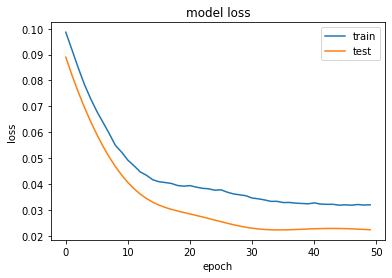

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
size = Calls.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat_calls = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat_calls = scaler.inverse_transform(inv_yhat_calls)
inv_yhat_calls = inv_yhat_calls[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat_calls))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1081.733


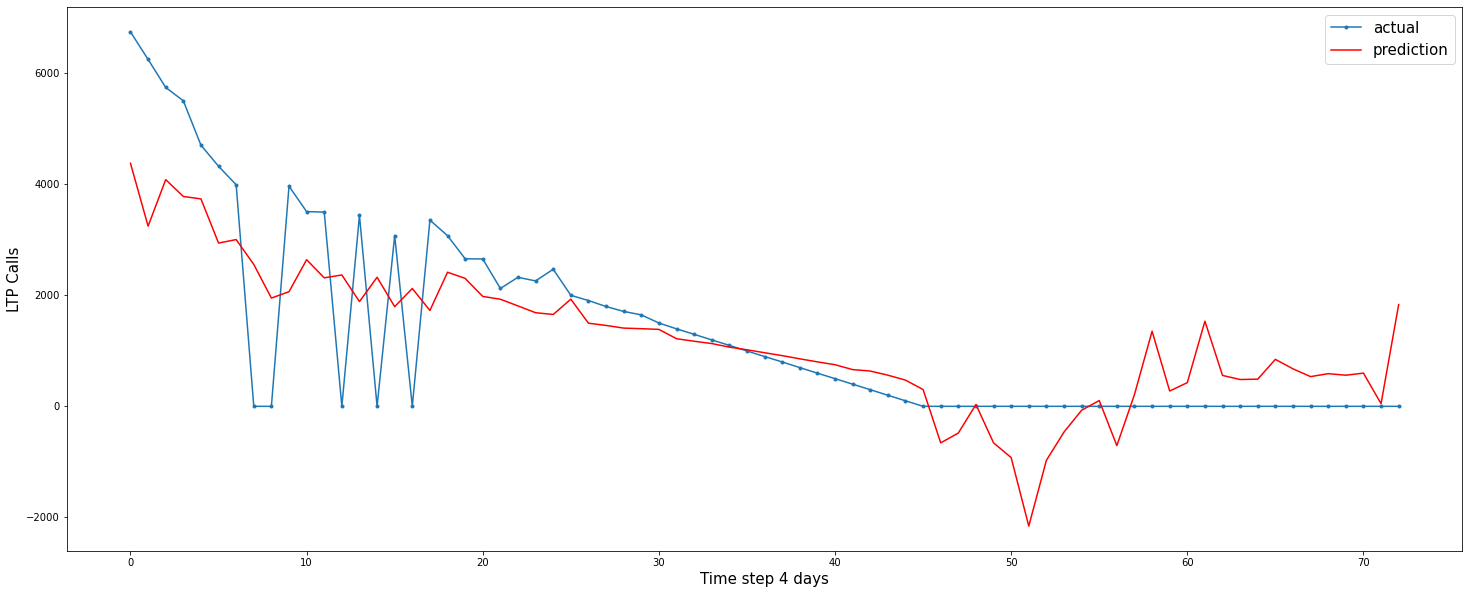

In [ ]:
import matplotlib.pyplot as plt
aa=[x for x in range(73)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat_calls, 'r', label="prediction")
plt.ylabel('LTP Calls', size=15)
plt.xlabel('Time step 4 days', size=15)
plt.legend(fontsize=15)
plt.show()

<h1> data Puts

In [ ]:
Puts = df[['LTP.1','BID QTY.1', 'BID.1', 'ASK.1', 'ASK QTY.1', 'CHNG.1', 'IV.1', 'VOLUME.1', 'CHNG IN OI.1','OI.1']]
Puts

,LTP.1,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
datetime,,,,,,,,,,
2022-12-12 09:00:00.000,2.45,1625.0,2.40,2.45,25.0,0.05,51.31,87801.0,9766.0,11351.0
2022-12-12 09:05:03.600,2.50,3400.0,2.45,2.50,250.0,-0.25,47.88,38171.0,1755.0,4375.0
2022-12-12 09:10:07.200,2.70,525.0,2.70,2.80,25.0,-0.35,44.72,23243.0,797.0,1227.0
2022-12-12 09:15:10.800,2.95,275.0,2.95,3.15,2950.0,-0.75,41.59,45981.0,3043.0,5108.0
2022-12-12 09:20:14.400,3.70,200.0,3.45,3.70,1200.0,-0.25,39.04,31505.0,190.0,3802.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-15 14:49:08.400,0.00,900.0,2206.95,2359.75,25.0,0.00,0.00,0.0,0.0,0.0
2022-12-15 14:54:12.000,0.00,75.0,2389.40,2418.30,25.0,0.00,0.00,0.0,0.0,0.0
2022-12-15 14:59:15.600,2418.20,75.0,2501.40,2519.65,50.0,469.65,0.00,13.0,-1.0,10.0


In [ ]:
values = Puts.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(Puts.shape[1]+1, 2*Puts.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.000503,0.005245,0.000504,0.000493,0.000183,0.811513,0.411336,0.006472,0.726963,0.070546,0.000513
2,0.000513,0.010975,0.000515,0.000503,0.001832,0.811413,0.383838,0.002814,0.668524,0.027190,0.000554
3,0.000554,0.001695,0.000567,0.000564,0.000183,0.811379,0.358506,0.001713,0.661536,0.007626,0.000605
4,0.000605,0.000888,0.000620,0.000634,0.021620,0.811245,0.333414,0.003389,0.677920,0.031746,0.000759
5,0.000759,0.000646,0.000725,0.000745,0.008794,0.811413,0.312971,0.002322,0.657108,0.023629,0.000820


In [ ]:
values = reframed.values

In [ ]:
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(300, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(train_x, train_y, epochs=50, batch_size=222, validation_data=(test_x, test_y), verbose=2, shuffle=False)


Epoch 1/50
1/1 - 5s - loss: 0.0455 - val_loss: 0.0287 - 5s/epoch - 5s/step
Epoch 2/50
1/1 - 0s - loss: 0.0419 - val_loss: 0.0261 - 101ms/epoch - 101ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0388 - val_loss: 0.0241 - 97ms/epoch - 97ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0368 - val_loss: 0.0228 - 97ms/epoch - 97ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0358 - val_loss: 0.0219 - 84ms/epoch - 84ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0337 - val_loss: 0.0212 - 80ms/epoch - 80ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0331 - val_loss: 0.0206 - 80ms/epoch - 80ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0322 - val_loss: 0.0199 - 87ms/epoch - 87ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0313 - val_loss: 0.0192 - 85ms/epoch - 85ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0301 - val_loss: 0.0184 - 100ms/epoch - 100ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0289 - val_loss: 0.0175 - 77ms/epoch - 77ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0278 - val_loss: 0.0167 - 81ms/epoch - 81ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0264 - val_loss: 0

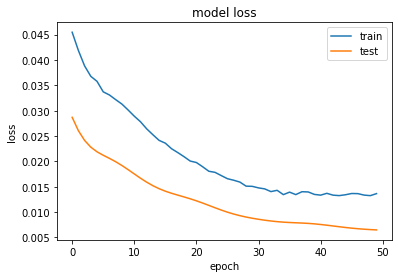

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
size = Puts.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat_puts = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat_puts = scaler.inverse_transform(inv_yhat_puts)
inv_yhat_puts = inv_yhat_puts[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat_puts))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 392.447


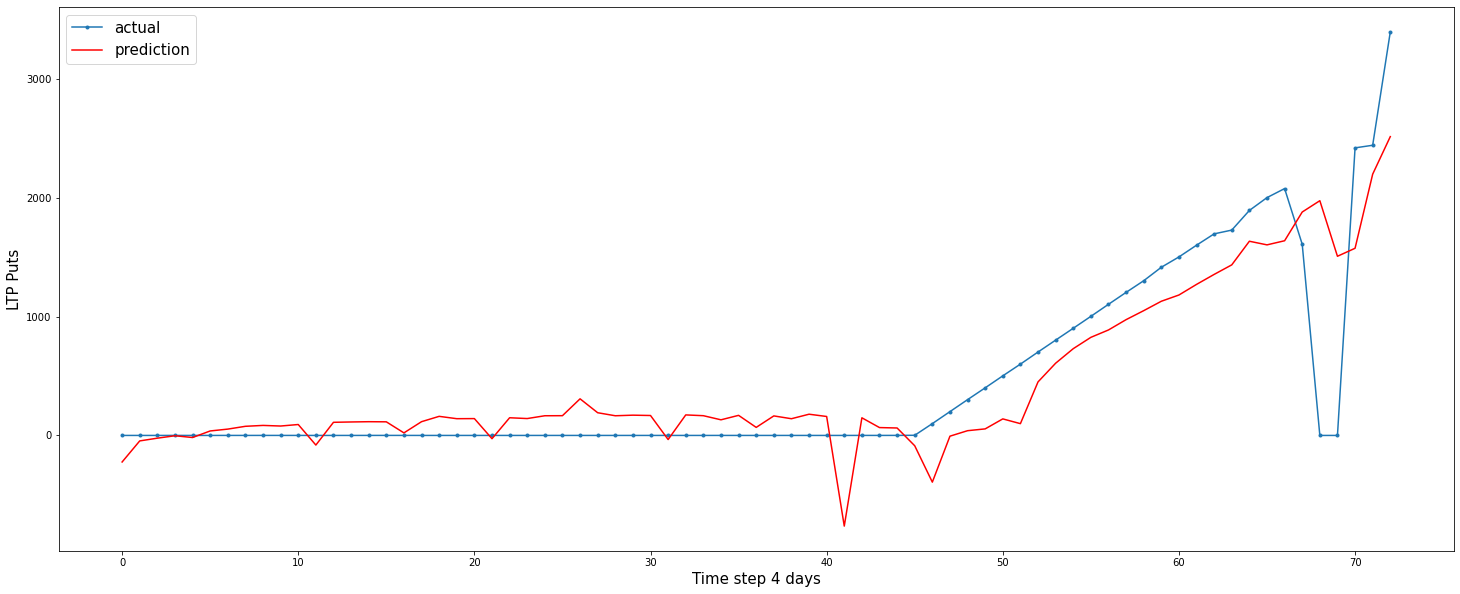

In [ ]:
import matplotlib.pyplot as plt
aa=[x for x in range(73)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat_puts, 'r', label="prediction")
plt.ylabel('LTP Puts', size=15)
plt.xlabel('Time step 4 days', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
index = df[['STRIKE']][223:296]

In [ ]:
index = index.values


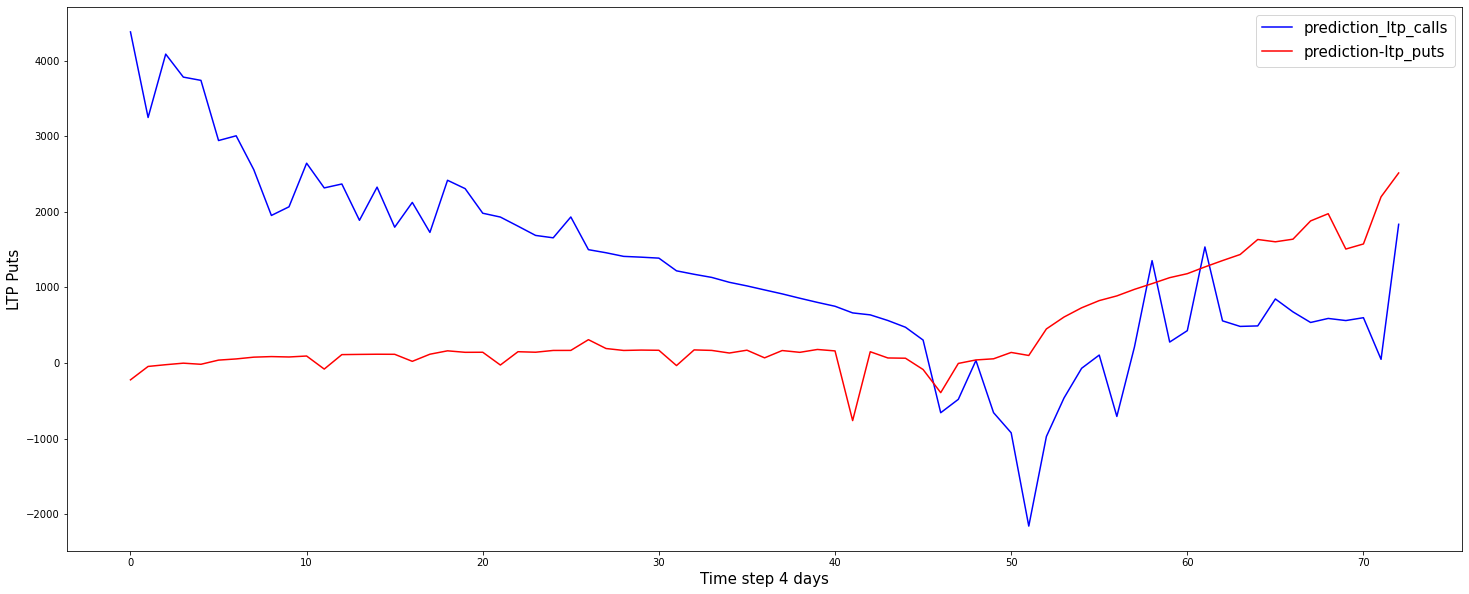

In [ ]:
import matplotlib.pyplot as plt
aa=[x for x in range(73)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_yhat_calls, 'b', label="prediction_ltp_calls")
plt.plot(aa, inv_yhat_puts, 'r', label="prediction-ltp_puts")

plt.ylabel('LTP Puts', size=15)
plt.xlabel('Time step 4 days', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
type(inv_yhat_calls)

numpy.ndarray

In [ ]:
inv_yhat_calls.tolist()
inv_yhat_puts.tolist()

[-223.33577717542647,
 -46.08225322663784,
 -23.017058038711546,
 -2.7222416013479234,
 -17.500836771726608,
 37.67410486415029,
 53.24880412220955,
 76.78480986952782,
 84.24757540524006,
 79.10775195658206,
 91.8114825308323,
 -80.87321663796902,
 110.41513312757016,
 113.230779504776,
 115.45698417425156,
 114.45487606227398,
 21.471831484884024,
 115.66727659106255,
 160.52363526821136,
 140.79783789217473,
 141.59622806310654,
 -27.39256689697504,
 148.6641527414322,
 141.95095916986466,
 165.53576496243477,
 166.06048803925515,
 307.88200994729993,
 190.89364511966704,
 165.47067402005194,
 170.3848403930664,
 167.61208248138428,
 -34.55926762521267,
 172.56291699409485,
 166.00050048828126,
 131.40354767739774,
 168.87863162755966,
 67.67996912300586,
 164.15023959875106,
 140.5403073221445,
 178.44275035858155,
 159.34042940735816,
 -762.3112640857696,
 148.31667716801167,
 66.10289404690266,
 62.63096697181463,
 -86.82157347500325,
 -392.6560973405838,
 -6.193655613064766,
 39

In [ ]:
inv_yhat_puts.shape

(73,)

In [ ]:
res_list = []
for i in range(1, len(inv_yhat_calls)):
    res_list.append(inv_yhat_calls[i] - inv_yhat_puts[i])
res_list

[3292.564414423704,
 4107.657794815302,
 3783.419274112582,
 3754.9685667216777,
 2904.0057747624815,
 2951.151895874739,
 2479.8494798600677,
 1866.6448857307435,
 1986.2068620145324,
 2550.3164301365614,
 2396.032531398535,
 2256.468608057499,
 1773.6832116991282,
 2209.7885635226967,
 1681.1359940335153,
 2101.874881545454,
 1611.0509307697414,
 2255.629881840944,
 2164.7481305271385,
 1838.7265709728001,
 1957.1052770212293,
 1660.6196008831262,
 1544.7742295414207,
 1489.6211679264902,
 1764.7505880743263,
 1190.4249574452638,
 1266.6678074508905,
 1244.1550565034152,
 1228.7752255946398,
 1218.7707646876574,
 1253.0244230747223,
 1000.2208753705024,
 965.4526581317186,
 935.2933925643563,
 850.1209723472595,
 898.2829535216092,
 749.4954756841064,
 715.5855847269297,
 622.672790132463,
 590.431303331256,
 1424.3228204503655,
 487.6709003508091,
 495.4012676894665,
 409.67202005535364,
 389.68997873179615,
 -265.5513227015734,
 -474.98410270810126,
 -6.930922881420699,
 -712.27138

In [ ]:
f=[]
for i in range(len(res_list)):
    if (res_list[i]<0):
        x= res_list[i] 
        m = res_list.index(x)
        f.append(m)
index_pred = f[0]

In [ ]:
index_pred

45

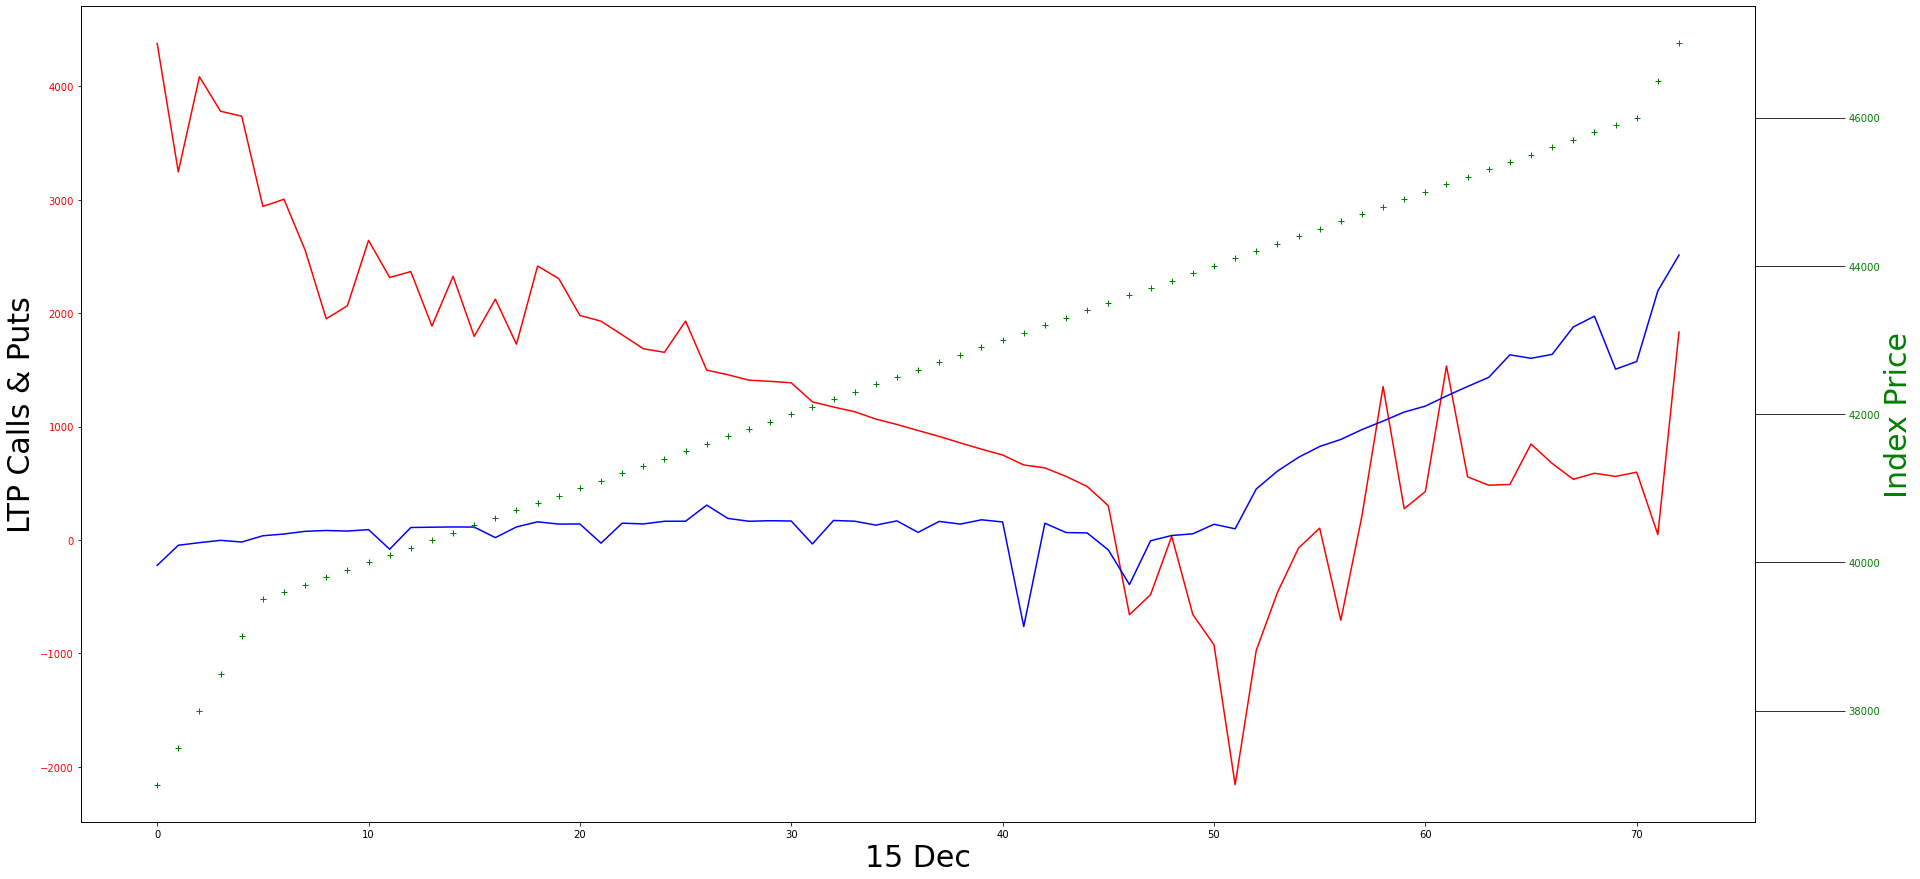

In [ ]:
fig,ax1=plt.subplots(figsize=(30,15))
ax1.set_xlabel('15 Dec',fontsize= 30) 
ax1.set_ylabel('LTP Calls & Puts',fontsize= 30) 
ax1.plot(aa, inv_yhat_calls, color = 'red') 
ax1.plot(aa, inv_yhat_puts, color = 'blue') 
ax1.tick_params(axis ='y', labelcolor = 'red') 


ax2 = ax1.twinx() 
  
ax2.set_ylabel('Index Price', fontsize= 30,color = 'green') 
ax2.plot(aa, index,'+', color = 'green') 
ax2.tick_params(axis ='y', size=90, labelcolor = 'green') 

In [ ]:
aa = np.asarray(aa)
aa.shape

(73,)

In [ ]:
index = np.asarray(index)
index.shape

(73, 1)

In [ ]:
index = index.reshape(index.shape[0],)

In [ ]:
index.shape

(73,)

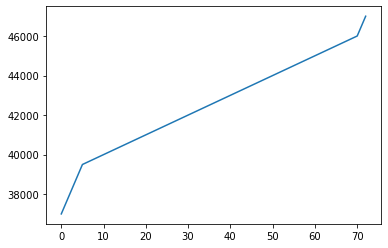

In [ ]:
aa = np.array(aa)
index = np.array(index)
plt.plot(aa, index)
plt.show()

In [ ]:
np.interp(index_pred, aa, index) 

43500.0